press Shift + enter to execute a code block

In [1]:
import numpy as np
from fourier_synthesis import fourier_synthesis
import matplotlib.pyplot as plt
import scipy.interpolate

upload your 1D PSD

see C1D.txt for a file format example

In [2]:
data = np.loadtxt("C1D.txt")

q = data[:,0]
C1D = data[:,1]

We convert the 1D PSD to the isotropic PSD

In [17]:
# STMP-PNAS equation (5)
Ciso = C1D * np.pi / q

if q[0] == 0:
    Ciso[0] = Ciso[1] # instead of infinity

# More elaborate alternative
# Dalvi formula 11
#Ciso = C1D * np.pi / (q * np.sqrt(1 - (q / qs)**2))


<ipython-input-17-ee197bf90ab7>:2: RuntimeWarning: divide by zero encountered in true_divide
  Ciso = C1D * np.pi / q


In [18]:
from fourier_synthesis import self_affine_prefactor

interpolator = scipy.interpolate.interp1d(q, Ciso,
                                          bounds_error=False,
                                          fill_value=(0,0))

def interpolate(q):
    return self_affine_prefactor((4096, 4096),(1e-5, 1e-5), 0.8, rms_height=1,
                                    short_cutoff=4,
                                    long_cutoff=1024)**2 * q**(- 2 - 2 * 0.8)

(1e-23, 2.0219669590615937e-10)

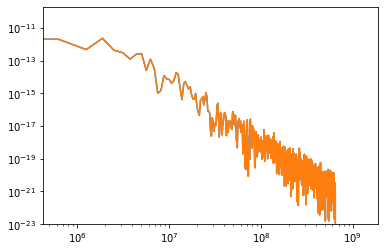

In [19]:
fig, ax = plt.subplots()

ax.loglog(q, Ciso)
ax.loglog(q, interpolator(q))

ax.set_ylim(bottom=1e-23)

In [20]:

heights = fourier_synthesis(
    nb_grid_pts=(4096,4096),
    physical_sizes=(1e-5, 1e-5),
    psd=interpolator,
    # Optional:
    #short_cutoff=4,
    #long_cutoff=1024
    )

In [21]:
from SurfaceTopography import Topography

t = Topography(heights,(1e-5, 1e-5), periodic=True)

(1e-25, 4.179655235298568e-10)

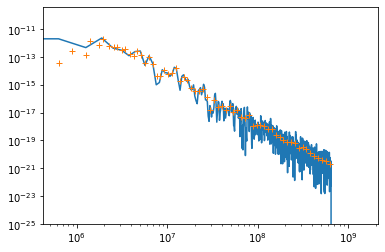

In [23]:
fig, ax = plt.subplots()

ax.plot(q, Ciso)
ax.plot(*t.power_spectrum_from_area(), "+")

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(bottom = 1e-25)

In [9]:
_q, _C1D = t.power_spectrum_from_profile()


/Users/antoines/binder_fourier_synthesis/venv/lib/python3.8/site-packages/SurfaceTopography/Uniform/PowerSpectrum.py:72: RuntimeWarning: invalid value encountered in multiply
  fourier_topography = sx/nx * np.fft.fft(h, axis=0)


In [10]:
_q[1]

628318.5307179586

In [11]:
q[1]

628318.5307179586

In [16]:
q[0]
Ciso[0]

inf